# Data Telco Customer Churn

**Rejani Zahwa(JCDS JKT)**

### **Contents**
1. Business Problem 
2. Data Understanding
3. Modeling
4. Recommendation 

# 1. Business Problem

## Context
Telco Customer Churn adalah salah satu segmen pasar terbesar kami. Platform jaringan Moratelindo dibangun, dioperasikan, dan diperluas sesuai dengan kebutuhan operator Telecom. Kami terus melayani untuk memastikan layanan terbaik. Prediksi perilaku untuk mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus.

* 0 : mempertahankan pelanggan
* 1 : melepas pelanggan

## Pernyataan masalah

jika salah satu dari mereka gagal, bisnis menderita. Retensi pelanggan lama lebih mudah daripada mendapatkan pelanggan baru. Selanjutnya, bahkan sedikit peningkatan dalam retensi klien meningkatkan penjualan dan keuntungan secara dramatis.

## Goals
Akibatnya, perusahaan ingin dapat memprediksi apakah pelanggan ingin meninggalkan perusahaan atau tidak. memahami pelanggan mana yang lebih mungkin untuk beralih ke pesaing dan variabel apa yang berkontribusi terhadap hal ini sangat penting bagi Telco. Perusahaan akan dapat mengoptimalkan kampanye retensi pelanggannya menggunakan data ini.

**Metrik Evaluation**

Type 1 error : False Positive  
Konsekuensi: sia-sianya biaya perekrutan, waktu dan sumber daya

Type 2 error : False Negative  
Konsekuensi: kehilangan pelanggan dan harus membayar semua biaya untuk memperoleh pelanggan pengganti



In [35]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, ShuffleSplit, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


### Data

In [36]:
df= pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [37]:
# informasi data  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


# 2. Data Understanding


* Dataset `data telco customer` memiliki 11 kolom dan 4930 Baris
* Kolom numerik `tunure` dan `MonthlyCharges`
* Kolom Prediksi `churn`
* Kolom kategori:
    * Dependent : Apakah pelanggan memiliki tanggungan atau tidak (Yes,NO) 
    * OnlineSecurity : Menunjukkan jika pelanggan berlangganan layanan keamanan online tambahan yang disediakan oleh perusahaan(No,Yes)
    * OnlineBackup : Apakah pelanggan memiliki cadangan online atau tidak (No, Yes, No internet service)
    * InternetService : Penyedia layanan internet pelanggan (DSL, Fiber optic, No)
    * DeviceProtection : Perlindungan Perangkat(Yes, No internet service, No)
    * TechSupport : Apakah pelanggan memiliki dukungan teknis atau tidak (Yes, No, No internet service)
    * Contract : Jangka waktu kontrak pelanggan (Month-to-month, Two year, One year)
    * PaperlessBilling : Apaah pelanggan memiliki tagihan tanpa kertas atau tidak (Yes,No)

### Check Missing value

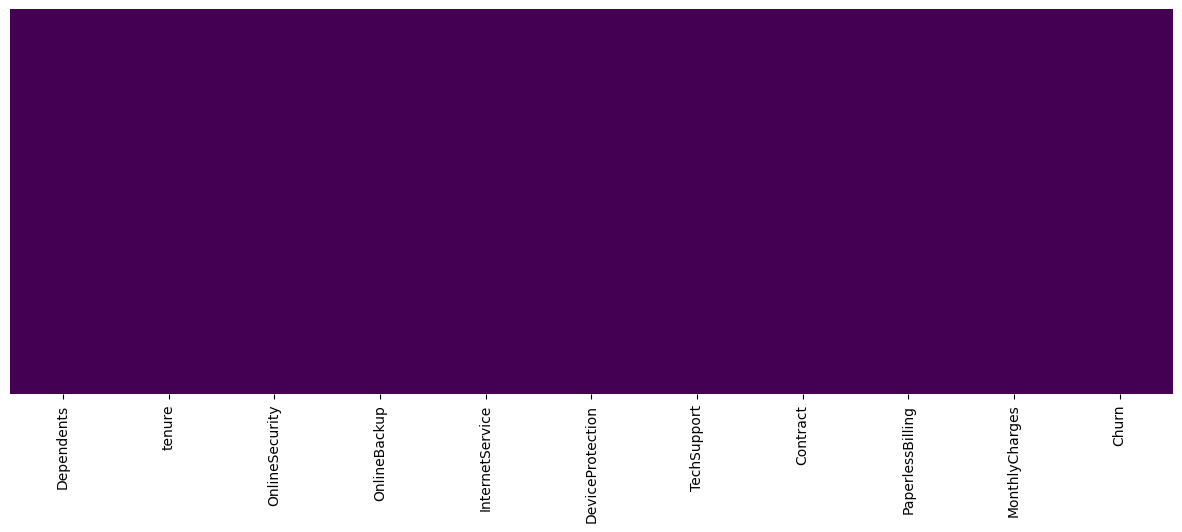

In [38]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.isna(), cmap = 'viridis',yticklabels = False, cbar= False)
plt.show()


### Info Data

In [39]:
# General data info
listItem = []
for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     len(df),
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col])) * 100,2),
                     df[col].nunique(), 
                     df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 
                               'Data Type', 
                               'Data Count', 
                               'Missing Value', 
                               'Missing Value Percentage', 
                               'Number of Unique', 
                               'Unique'],
                     data=listItem)
dfDesc


,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique
0,Dependents,object,4930,0,0.0,2,"[Yes, No]"
1,tenure,int64,4930,0,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,4930,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,4930,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,4930,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,4930,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,4930,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,4930,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,4930,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,4930,0,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


* Dapat dilihat bahwa setiap kolom tidak memiliki Missing value. Setiap kolom juga memiliki lebih dari satu unique yang berarti setiap kolom dapat digunakan dalam klasifikasi.

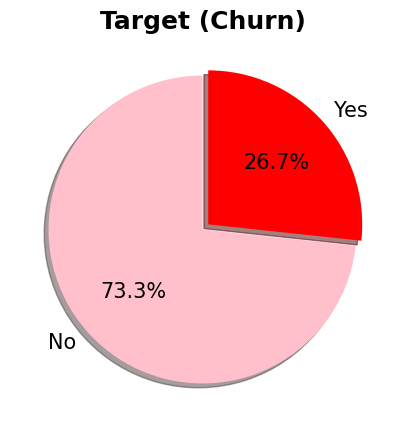

In [40]:
plt.figure(figsize=(5,5))
plt.title('Target (Churn)', size=18, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.05), labels=['No', 'Yes'], colors=['pink','red'], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":15})

plt.show()

### Target
- Yes -> 1 : 26.7%
- No-> 0 : 73.3%

### Numerikal Feature
bisa kita lihat bahwa hanya ada 2 kolom numerikal tenure dan MonthlyCharges.

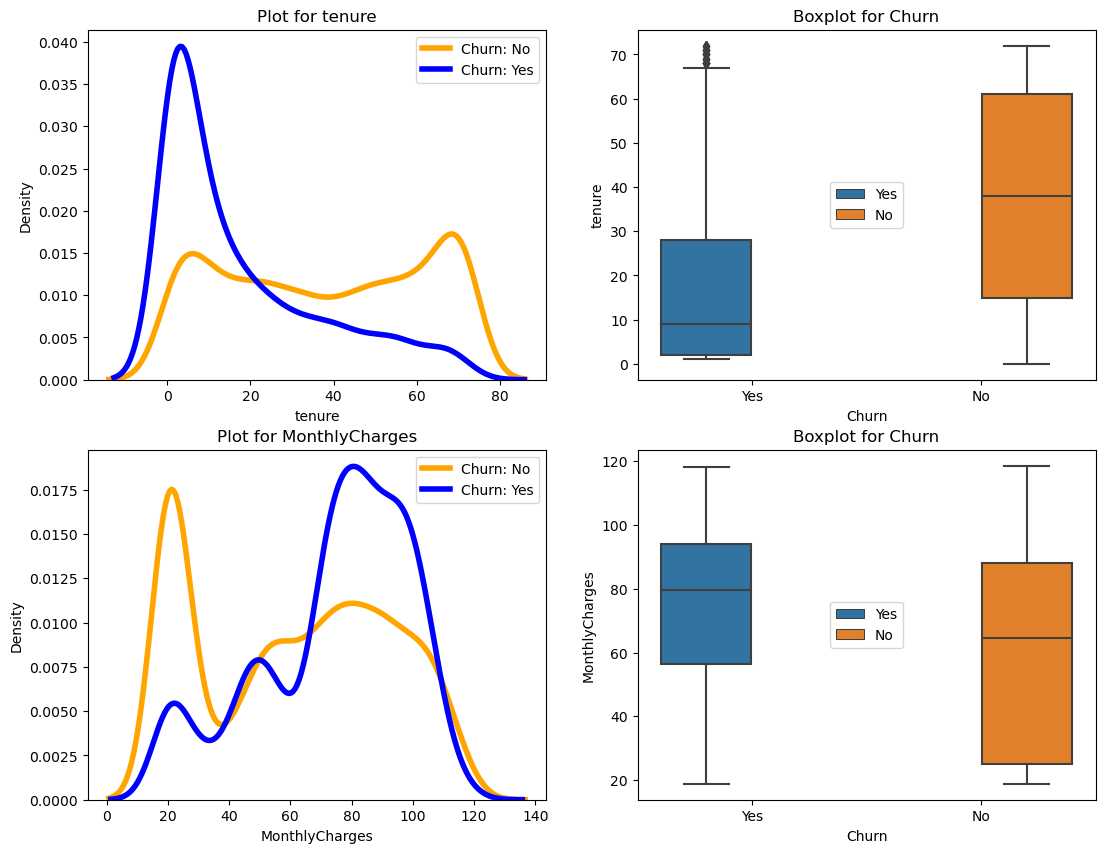

In [41]:
plt.figure(figsize=(13, 10))
def plotting(target, feature, hist, kde, subplot):
    plt.subplot(subplot)
    plt.title("Plot for {}".format(feature))
    sns.distplot(df[df[target] == 'No'][feature], hist=hist, kde=kde, 
                 color = 'orange',  
                 label= target + ': No',
                 kde_kws={'linewidth': 4})
    sns.distplot(df[df[target] == 'Yes'][feature], hist=hist, kde=kde, 
                 color = 'blue',  
                 label= target + ': Yes',
                 kde_kws={'linewidth': 4})
    plt.legend()
    plt.subplot(subplot+1)
    plt.title("Boxplot for {}".format(col))
    sns.boxplot(data = df,y = feature, x = target, hue = target)
    plt.legend(loc='center')

plotting(target = 'Churn', feature = 'tenure', hist = False, kde = True, subplot = 221)

plotting(target = 'Churn', feature = 'MonthlyCharges', hist = False, kde = True, subplot = 223)

plt.show()


###  kesimpulan:
- Pengguna baru (low tenure) lebih cenderung churn
- Pengguna dengan MonthlyCharges yang lebih tinggi juga lebih cenderung berhenti menggunakan

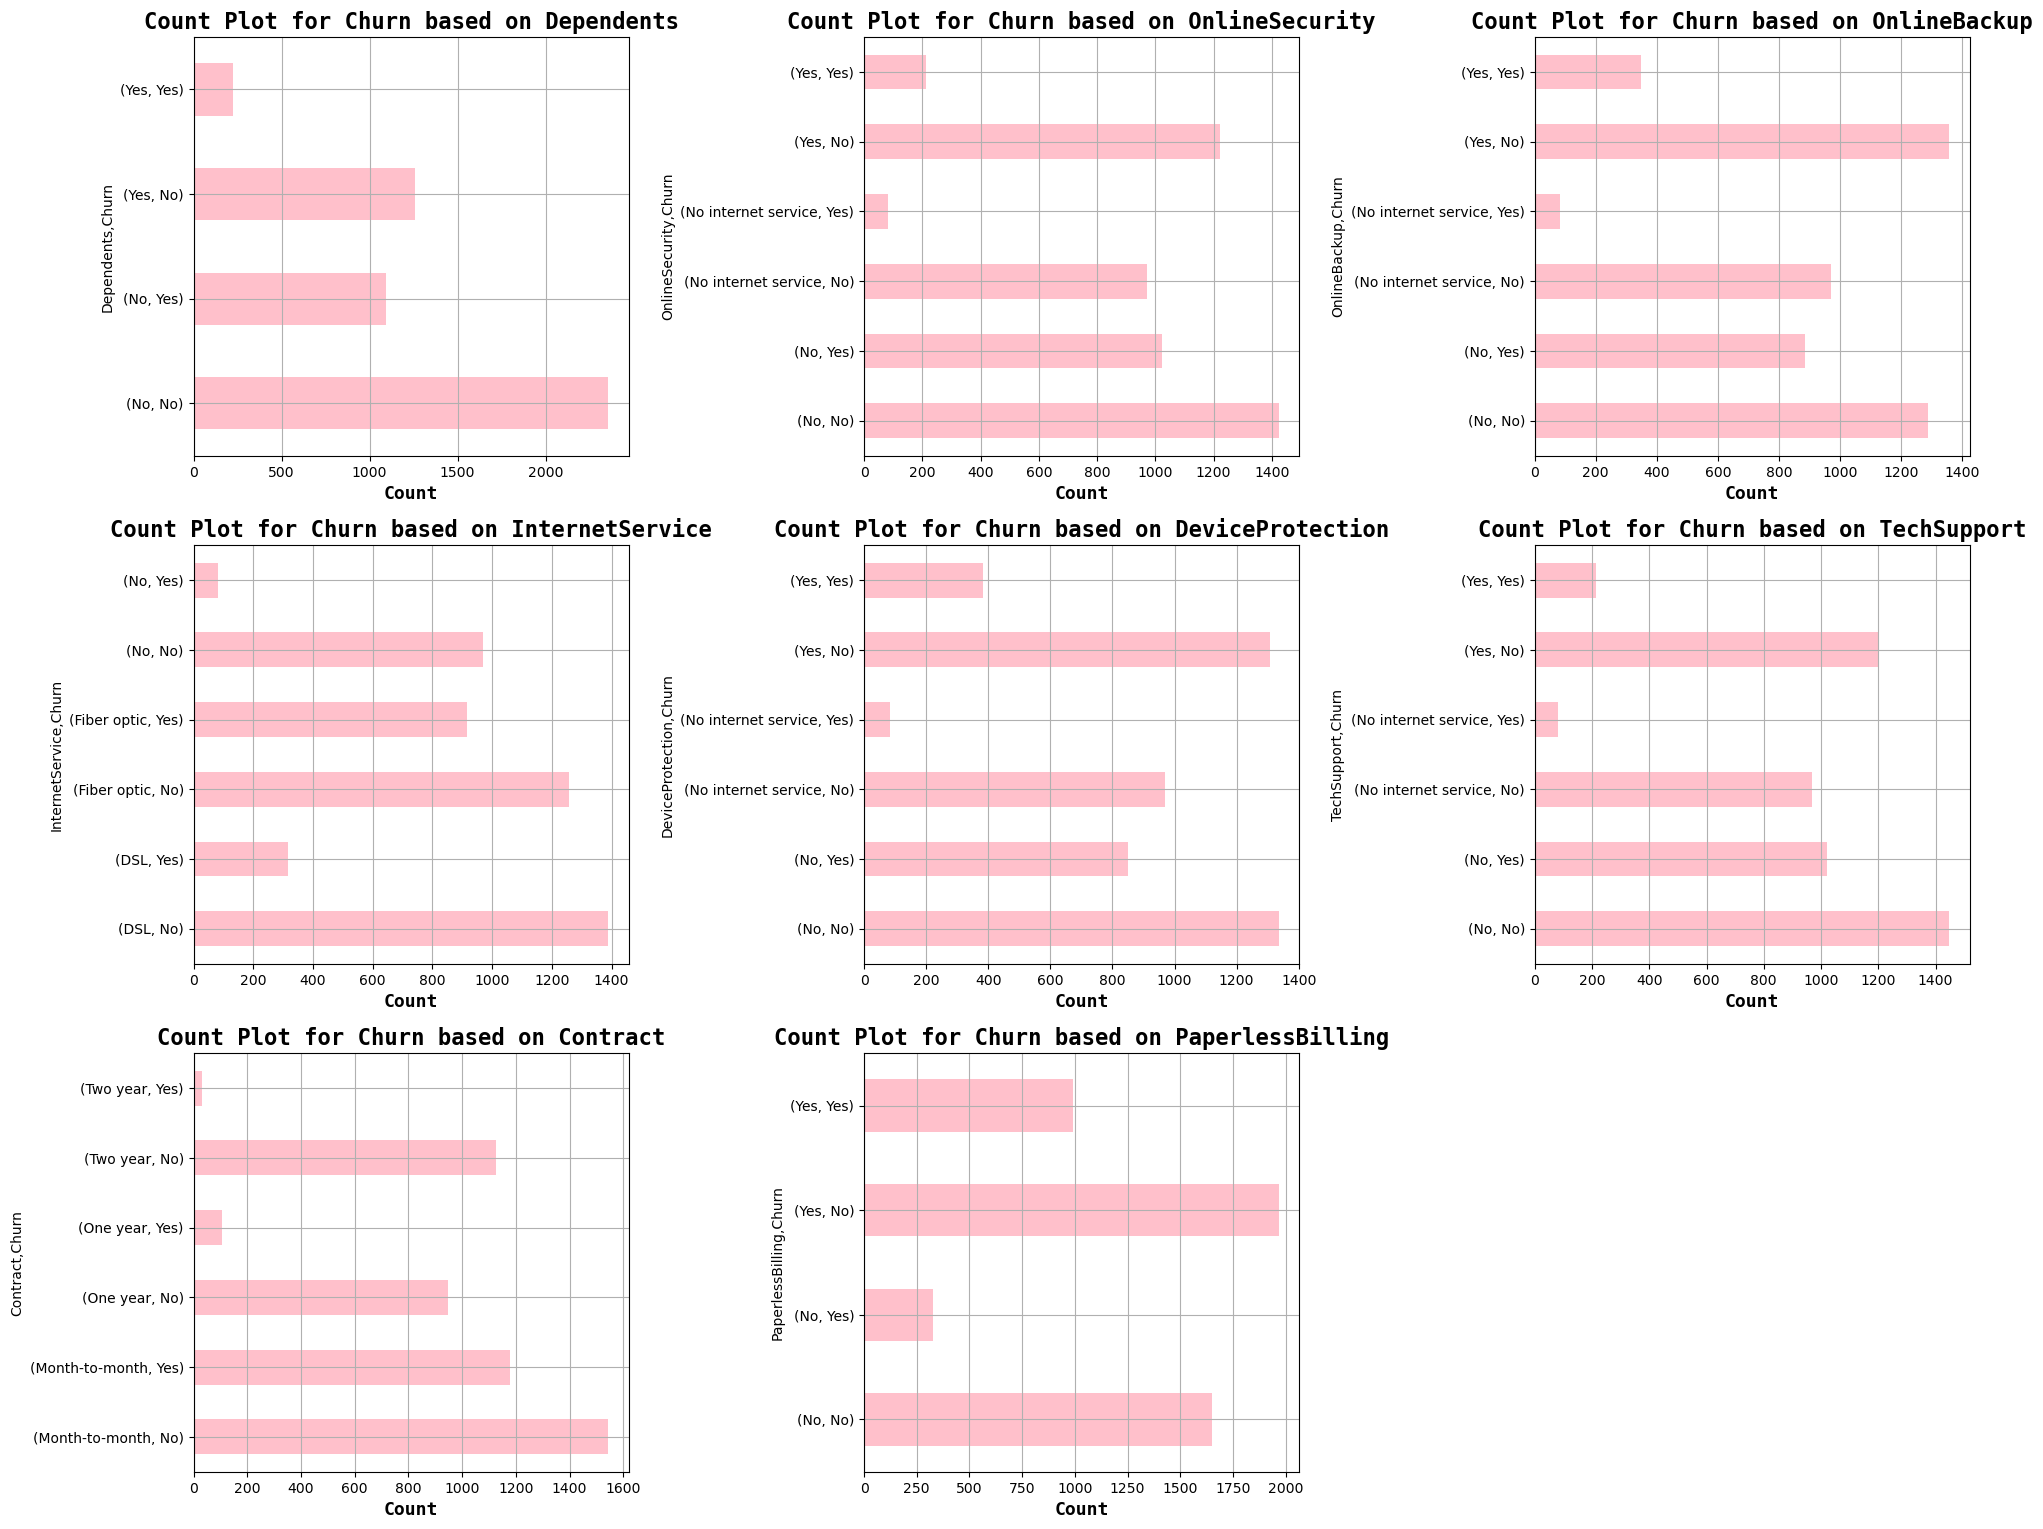

In [42]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['tenure','MonthlyCharges','Churn']).columns:
    count +=1
    ax= plt.subplot(4,3,count)
    plt.title('Count Plot for Churn based on {}'.format(i), size=16, fontweight='bold', fontfamily='monospace')
    df.groupby(df[i])['Churn'].value_counts().plot(kind='barh', color='pink', ax=ax) 
    plt.xlabel('Count',size=13, fontweight='bold', fontfamily='monospace')
    plt.grid(True)
    fig.tight_layout()
    
plt.show()


Berdasarkan Barplot di atas, dapat disimpulkan:

- Customers `Without` Dependents 4 kali lebih sering meninggalkan perusahaan Telekomunikasi, dari pada Customer with Dependents.
- Cutomers `Without` (OnlineSecurity = No) 5 kali lebih sering meninggalkan perusahaan Telco, daripada Customer dengan (OnlineSecurity = Yes).
- Customer `Without` (OnlineBackup = No) 3 kali lebih sering meninggalkan perusahaan Telco, daripada Customer dengan (OnlineBackup = Yes).
- Pelanggan dengan layanan Internet `Fiber optic`2.2 kali lebih sering meninggalkan Telco company, daripada Customer dengan DSL.
- Customers `Without` (DeviceProtection = No) 2 kali lebih sering meninggalkan Telco Company , daripada Customer dengan (DeviceProtection = Yes).
- Customers `Without` (TechSupport = Tidak) 5 kali lebih sering meninggalkan Telco Company, daripada Customer dengan (TechSupport = Yes).
- Customers dengan  `month-to-month` contract type 6,3 kali lebih sering meninggalkan Telco Company, dari pada Customer dengan jenis Kontrak One-year dan two-year
- Customers `Without` PaperlessBilling 4 kali lebih sering meninggalkan Telco Company, dari pada klien dengan penagihan kertas.

Dari semua variabel yang telah dijelaskan, dapat disimpulkan bahwa semua variabel signifikan untuk digunakan dalam proses pemodelan.


### Data Preparation

In [43]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


Kemudian fitur Contract akan diubah dalam bentuk ordinal menggunakan OrdinalEncoder, dan kolom dengan tipe data objek lainnya akan diubah menggunakan OneHotEncoder.

# 3. Modeling

**Changing Target values**

In [44]:
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [45]:
# Assign Independent and Dependent Variable
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [46]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = .80, random_state=42)


In [47]:
ohe_col = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling'] 
ord_col = ['Contract']
ord_map = [{'col' : 'Contract', 
            'mapping' :{'Month-to-month' : 0, 
                        'One year' : 1,
                        'Two year' : 2
                       }
           }]

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ohe_col ),
    ('ordinal', ce.OrdinalEncoder(mapping= ord_map), ord_col)
], remainder='passthrough')

base_LogReg = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

base_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

base_DT = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeClassifier())
])

base_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

base_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

In [48]:
base_model= [base_LogReg, base_KNN, base_DT, base_RF, base_XGB]
model = ['LogReg', 'KNN', 'DT', 'RF', 'XGB']
data = {}

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    y_predict_proba = Model.predict_proba(X)[:,1]
    roc_auc = roc_auc_score(y_true, y_predict_proba)
    return Acc, Rec, Prec, F1, roc_auc

for i in range(len(base_model)):
    base_model[i].fit(X_train, y_train)
    Acc_train, Rec_train, Prec_train, F1_train, roc_auc_train = Eva_Matrix(base_model[i], X_train, y_train)
    Acc_test, Rec_test, Prec_test, F1_test, roc_auc_test = Eva_Matrix(base_model[i], X_test, y_test)
    data[f'Train {model[i]}'] = Acc_train, Rec_train, Prec_train, F1_train, roc_auc_train
    data[f'Test {model[i]}'] = Acc_test, Rec_test, Prec_test, F1_test, roc_auc_test
pd.DataFrame(data = data, index = ["Accuracy", "Recall", "Precision", "F1", "roc_auc"]).T.sort_values('F1', ascending=False)


,Accuracy,Recall,Precision,F1,roc_auc
Train RF,0.992647,0.981007,0.991363,0.986158,0.999666
Train DT,0.992647,0.973409,0.999025,0.986051,0.999851
Train XGB,0.921653,0.819563,0.878819,0.848157,0.977187
Train KNN,0.835446,0.628680,0.719565,0.671059,0.896988
Test LogReg,0.796146,0.558935,0.633621,0.593939,0.856649
Test XGB,0.788032,0.570342,0.609756,0.589391,0.841566
Train LogReg,0.794878,0.527066,0.640878,0.578426,0.840531
Test KNN,0.768763,0.520913,0.573222,0.545817,0.779370
Test RF,0.778905,0.482890,0.607656,0.538136,0.816917
Test DT,0.727181,0.479087,0.488372,0.483685,0.656509


Selanjutnya, kemampuan model dasar akan diurutkan berdasarkan skor F1-nya karena himpunan data tidak seimbang.

In [49]:
sm = SMOTE(random_state=42)

In [50]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names())

In [51]:
df_SMOTE = pd.concat([X_train, y_train], axis=1)


In [52]:
df_SMOTE['Churn'].value_counts()

0.0    2891
1.0    1053
Name: Churn, dtype: int64

In [53]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [54]:
models= [logreg, knn, dt, rf, xgb]
model = ['LogReg', 'KNN', 'DT', 'RF', 'XGB']
data = {}

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    Acc_train, Rec_train, Prec_train, F1_train, roc_auc_train = Eva_Matrix(models[i], X_train, y_train)
    Acc_test, Rec_test, Prec_test, F1_test, roc_auc_test = Eva_Matrix(models[i], X_test, y_test)
    data[f'Train {model[i]}'] = Acc_train, Rec_train, Prec_train, F1_train, roc_auc_train
    data[f'Test {model[i]}'] = Acc_test, Rec_test, Prec_test, F1_test, roc_auc_test
pd.DataFrame(data = data, index = ["Accuracy", "Recall", "Precision", "F1", "roc_auc"]).T.sort_values('Accuracy', ascending=False)


,Accuracy,Recall,Precision,F1,roc_auc
Train DT,0.992647,0.973409,0.999025,0.986051,0.999851
Train RF,0.992647,0.981956,0.990421,0.986171,0.999639
Train XGB,0.921653,0.819563,0.878819,0.848157,0.977187
Train KNN,0.835446,0.628680,0.719565,0.671059,0.896988
Test LogReg,0.796146,0.558935,0.633621,0.593939,0.856649
Train LogReg,0.794878,0.527066,0.640878,0.578426,0.840531
Test XGB,0.788032,0.570342,0.609756,0.589391,0.841566
Test RF,0.772819,0.452471,0.597990,0.515152,0.821469
Test KNN,0.768763,0.520913,0.573222,0.545817,0.779370
Test DT,0.738337,0.475285,0.510204,0.492126,0.663088


### Logistic Regression

In [55]:
# Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       723
           1       0.63      0.56      0.59       263

    accuracy                           0.80       986
   macro avg       0.74      0.72      0.73       986
weighted avg       0.79      0.80      0.79       986



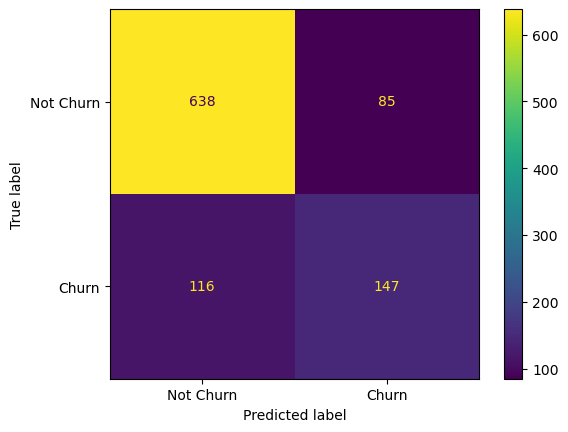

In [56]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['Not Churn', 'Churn'])

Model regresi logistik mampu memprediksi 81% dari semua pelanggan yang harus churn. Tetapi model hanya memiliki presisi 51%, yang berarti bahwa model prediksi hanya tepat untuk 51% pelanggan yang model prediksinya akan bergolak. (Berdasarkan Recall)


### XGBoosting

In [57]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       723
           1       0.61      0.57      0.59       263

    accuracy                           0.79       986
   macro avg       0.73      0.72      0.72       986
weighted avg       0.78      0.79      0.79       986



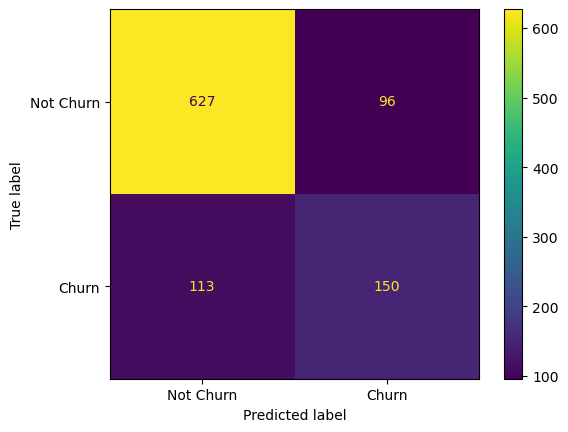

In [58]:
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Not Churn', 'Churn'])

Model XGBoosting mampu memprediksi semua pelanggan yang harus churn. Tetapi model hanya memiliki presisi 61%, yang berarti bahwa model prediksi hanya tepat untuk 61% pelanggan yang model prediksinya akan bergolak.
Kedua model dasar dengan rekayasa fitur yang telah dilakukan memiliki kelebihan dan kekurangan yang dapat dilihat dari matriks kebingungan. Di mana XGBoosting memiliki hasil yang lebih 'diplomatik' daripada regresi logistik, jadi kita perlu mengoptimalkan kedua model dengan penyetelan hiperparameter untuk setiap model.



### Random Forest

In [59]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       723
           1       0.60      0.45      0.52       263

    accuracy                           0.77       986
   macro avg       0.71      0.67      0.68       986
weighted avg       0.76      0.77      0.76       986



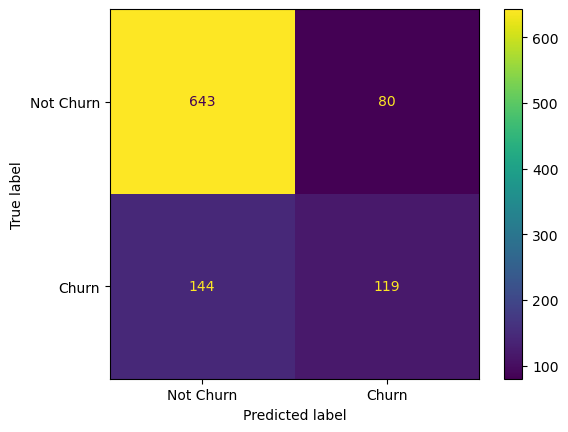

In [60]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Not Churn', 'Churn'])

### Hyperparameter Tuning

In [61]:
param_LR = {
    'C' : np.logspace(-3, 3, 7),
    'penalty' : ['l1', 'l2', 'elasticnet']

}
skf = StratifiedKFold(n_splits=4)


In [62]:
GS_logreg = GridSearchCV(logreg, param_LR, cv = skf, n_jobs=-1, verbose = True)

In [63]:
GS_logreg.fit(X_train, y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=True)

In [64]:
GS_logreg.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [65]:
LR_Tuned = GS_logreg.best_estimator_

In [66]:
print(classification_report(y_test, LR_Tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       723
           1       0.64      0.56      0.60       263

    accuracy                           0.80       986
   macro avg       0.74      0.72      0.73       986
weighted avg       0.79      0.80      0.79       986



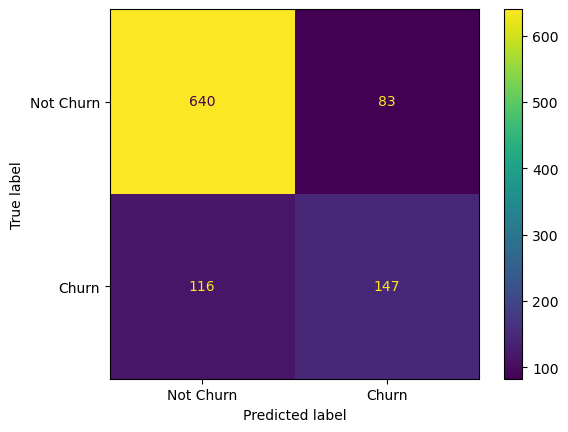

In [67]:
plot_confusion_matrix(LR_Tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'])

Model regresi logistik mampu memprediksi 81% dari semua pelanggan yang harus churn. tetapi model hanya memiliki presisi 52%, yang berarti bahwa model prediksi hanya tepat untuk 52% pelanggan yang model prediksinya akan bergolak. (Berdasarkan Recall). Sedikit lebih baik daripada tanpa penyetelan.


### Model & Cost Evaluation

Untuk mengevaluasi model yang telah kita tentukan (Logistic Regression, Extreme Gradient Boosting Tuned, Extreme Gradient Boosting (Recall) after Tuned), kita akan membuat skenario sebagai berikut:

Kami mengasumsikan biaya untuk memperoleh pelanggan baru hingga 5 kali lebih tinggi daripada biaya mempertahankan mereka.

Jadi, saya membuat asumsi biaya berikut untuk mengeksplorasi implikasi biaya dari penerapan model.

* Saya menetapkan True negative biaya 0 .
* False negative adalah yang paling merusak, karena mereka meramalkan secara salah bahwa konsumen yang berputar akan tetap tinggal. Saya akan kehilangan pelanggan dan akan bertanggung jawab atas biaya apa pun yang terkait dengan menemukan pengganti, termasuk kehilangan pendapatan, biaya iklan, biaya administrasi, dan sebagainya. Saya akan mengasumsikan biaya 5 adalah biaya false negative
* terahir untuk pelanggan yang diidentifikasi oleh model saya sebagai churning (True Positives & False Positives), saya akan mengasumsikan 1* cost(TP&FP)

Jadi, kita akan memiliki persamaan untuk menggambarkan biaya. Tujuan kami adalah untuk meminimalkan biaya:


In [68]:
data = {'no model' : [1315],
        'voucher to all customer' : [986],
        'ideal model' : [263],
        'Logistic Regression Tuned' : [659],
        'XGBoosting Fine Tuned' : [716],
       }
dfcost = pd.DataFrame(data=data, index=['Cost Amplification'])
cost = dfcost.T.sort_values('Cost Amplification', ascending=False)


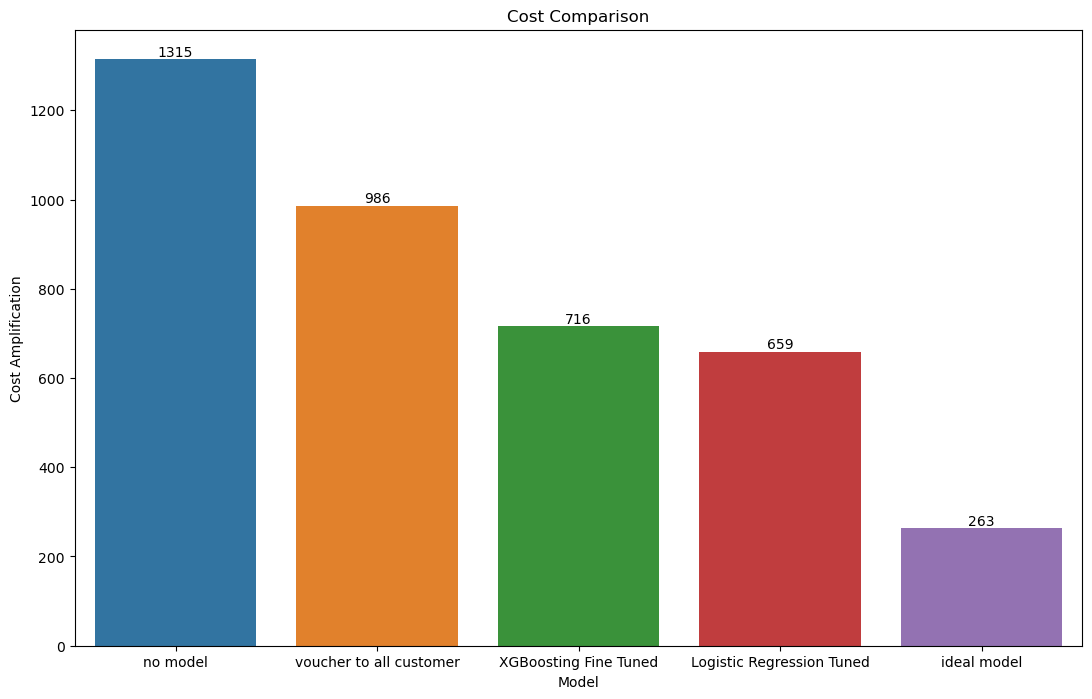

In [69]:
plt.figure(figsize=(13,8))
ax = sns.barplot(cost.index,cost['Cost Amplification'])
plt.title('Cost Comparison')
plt.xlabel('Model')
ax.bar_label(ax.containers[0])
plt.show()


Dari barplot di atas kita dapat melihat bahwa dengan menggunakan Logistic Regression Tuned Model kita dapat mengurangi jumlah biaya yang dikeluarkan:

* sekitar 50% pengurangan dari worstcase (tanpa model) dan
* sekitar 33% pengurangan dari fokus pada retensi pelanggan (voucher untuk semua pelanggan).

Ini berarti bahwa dengan model ini, perusahaan Telco dapat menghemat sekitar 50% dari total pengeluaran mereka.

## Conclusion & Recommendation
* Conclusion:
    1. Dari analisis yang telah dijelaskan, model yang tepat untuk kasus ini adalah Regresi Logistik yang telah dilakukan dengan penyetelan hiperparameter.
    2. Nilai Hyperparameter terbaik adalah sebagai berikut: {'C': 0.1, 'penalty': 'l2'}
    3. Nilai Recall dan Precision masing-masing (berdasarkan kelas recall(+)) adalah 81% dan 52%.
    4. Untuk skenario yang telah dibuat, model mampu menghemat biaya hingga 50% dari total biaya jika model tidak diimplementasikan.

* Rekomendasi:
    1. Implementasi Model terbatas pada kasus-kasus ketika biaya yang dihasilkan untuk churn pelanggan sekitar 5 kali lebih besar dari biaya retensi. Di luar hal ini kepercayaan model yang digunakan akan berbeda (low p-value), karena kemampuan model akan tergantung pada matriks evaluasi yang akan digunakan dalam rumus biaya.
    2. Menambahkan fitur dalam pemilihan fitur seperti metode pembayaran yang digunakan, layanan streaming, atau hal lain yang berkaitan dengan layanan telekomunikasi domain.
    3. Coba kombinasi rekayasa fitur dan pemodelan algoritme Pembelajaran Mesin lainnya.
    4. Melakukan analisis data yang lebih mendalam untuk data yang disalahartikan oleh model (FP & TP) agar mengetahui karakteristiknya.
